## 2D Generator ##

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse, ellipse_perimeter
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

In [9]:
image = np.zeros((600, 600)) # the size of canvas

y, x = np.random.randint(low=50, high=550, size=(1,2)).tolist()[0]
l_r, s_r = np.random.randint(low=100,high=200,size=(1,2)).tolist()[0] # the lagest number(excluded, should smaller than canvas), 
print('y,x,l_r,s_r:',y,x,l_r,s_r)

if y < l_r or l_r > image.shape[1]-y:
    l_r = min(y,image.shape[1]-y)
    
if x < s_r or s_r > image.shape[0]-x:
    s_r = min(x,image.shape[0]-x)

print('after adjustment y,x,l_r,s_r:',y,x,l_r,s_r)
# size = (the size of the generated narray)

rr, cc = ellipse(y, x, l_r, s_r, shape = image.shape)
image[rr, cc] = 1
# rr, cc = ellipse_perimeter(y, x, l_r, s_r, shape = image.shape)
# image[rr, cc] = 1


# lumen generator
rr_lumen, cc_lumen = ellipse(y, x, l_r-40, s_r-40, shape = image.shape)
# rr_lumen, cc_lumen = ellipse_perimeter(y, x, l_r-45, s_r-40, shape = image.shape)
image[rr_lumen, cc_lumen] = 2

# rotate
image = rotate(image, angle = -45, order = 0) # clockwise, parameter angle, order, rotate_flag

# second image
rr, cc = ellipse(100, 100, 80, 70)
image[rr, cc] = 1

rr_lumen, cc_lumen = ellipse(100, 100, 40, 30)
image[rr_lumen, cc_lumen] = 2

label_img, label_num= label(image,return_num=True) # Label connected regions of an integer array.
regions = regionprops(label_img) # Measure properties of labeled image regions.


label_num

y,x,l_r,s_r: 430 289 198 119
after adjustment y,x,l_r,s_r: 430 289 170 119


4

minor_axis_length: 154.629161911519
minor_axis_length: 59.815382369349315
minor_axis_length: 298.68112735644866
minor_axis_length: 157.9112928432104


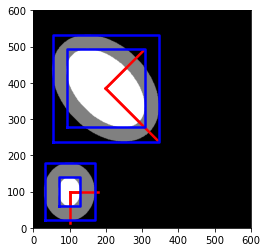

In [10]:
fig, ax = plt.subplots() 
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid # x0 is behind y0
    # print(y0,x0)
    orientation = props.orientation
    
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length
    
    print('minor_axis_length:',props.minor_axis_length)
#   print(props.major_axis_length)

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5) 

    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)


    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, image.shape[0], 0, image.shape[1]))
plt.show()

In [127]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length',
                                                 'label'))

In [128]:
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,label
0,100.000000,100.000000,0.000000,175.430971,154.629162,1
1,100.000000,100.000000,0.000000,79.803653,59.815382,2
2,294.551713,233.045320,-0.783661,307.882990,249.082059,3
3,294.547047,233.018463,-0.787109,182.188941,125.676477,4
